# Big Picture

In this project we are going to be using the mushroom data set. The mushroom data set has categorical and numerical data on the shape, size, smell, odor, etc. of mushrooms. The attribute that we are most interested in is the edible attribute. This attribute tells us whether or not a mushroom is edible or not. Building a classifier that could predict whether or not a mushroom is edible would be helpful in creating an app that allows nature guides, campers, etc. whether or not they are able to eat mushrooms they come across.

# Getting the Data

The reason that I chose the mushroom data set is that it has real world applications. Knowing whether or not a mushroom is edible or not could be a life or death situation if someone ever finds themselves stranded in the wilderness without food. Having a model that could predict whether or not a mushroom is edible could lead to the development of an application that could possibly use visual analytics to save lives if anyone ever finds themselves having to eat wild mushrooms.

url for data: https://www.kaggle.com/uciml/mushroom-classification

In [2]:
import pandas as pd
import numpy as np
import pylab as pl
%matplotlib inline
from matplotlib import pyplot as plt
plt.style.use('ggplot') # Have a nicer style of the plots

mushrooms = pd.read_csv('mushrooms.csv')

In [3]:
import os
size = os.path.getsize('mushrooms.csv')
size

374003

The file for the mushroom data set is 3.75 MB. 

In [4]:
mushrooms.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8124 entries, 0 to 8123
Data columns (total 23 columns):
class                       8124 non-null object
cap-shape                   8124 non-null object
cap-surface                 8124 non-null object
cap-color                   8124 non-null object
bruises                     8124 non-null object
odor                        8124 non-null object
gill-attachment             8124 non-null object
gill-spacing                8124 non-null object
gill-size                   8124 non-null object
gill-color                  8124 non-null object
stalk-shape                 8124 non-null object
stalk-root                  8124 non-null object
stalk-surface-above-ring    8124 non-null object
stalk-surface-below-ring    8124 non-null object
stalk-color-above-ring      8124 non-null object
stalk-color-below-ring      8124 non-null object
veil-type                   8124 non-null object
veil-color                  8124 non-null object
ring-number

There are 8124 entries in the data set. The 23 features that it has are: the classification (whether is is edible or poisonous), the cap shape, the cap surface type, the cap color, the occurence of bruises, the type of gill attachment, the gill spacing, the gill size, the gill color, the stalk shape, the stalk root type, the stalk surface type above the ring, the stalk surface type below the ring, the stalk color above the ring, the stalk color below the ring, the veil type, the veil color, the ring number, the ring type, the spore print color, the population type, and the habitat type. All of the attributes are categorical and have specific values that are listed in the meta data of the data set.

In [5]:
mushrooms.head()

,class,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,...,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
0,p,x,s,n,t,p,f,c,n,k,...,s,w,w,p,w,o,p,k,s,u
1,e,x,s,y,t,a,f,c,b,k,...,s,w,w,p,w,o,p,n,n,g
2,e,b,s,w,t,l,f,c,b,n,...,s,w,w,p,w,o,p,n,n,m
3,p,x,y,w,t,p,f,c,n,n,...,s,w,w,p,w,o,p,k,s,u
4,e,x,s,g,f,n,f,w,b,k,...,s,w,w,p,w,o,e,n,a,g


In [6]:
mushrooms.describe()

,class,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,...,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
count,8124,8124,8124,8124,8124,8124,8124,8124,8124,8124,...,8124,8124,8124,8124,8124,8124,8124,8124,8124,8124
unique,2,6,4,10,2,9,2,2,2,12,...,4,9,9,1,4,3,5,9,6,7
top,e,x,y,n,f,n,f,c,b,b,...,s,w,w,p,w,o,p,w,v,d
freq,4208,3656,3244,2284,4748,3528,7914,6812,5612,1728,...,4936,4464,4384,8124,7924,7488,3968,2388,4040,3148


Looking at a snapshot of the data we can see that all off the attributes have single character values so we will need to figure out what those characters correspond with. Most of the attributes have only two values. There are not really any numerical attributes so the only statistics that the describe function really gives us the top value for each attribute and its frequency. 

# Discovery and Visualization

There are 23 different attributes in this data set so visualizing that many feature plots would create more than 200 plots. Many of those plots would be unneccessary so I want to cut down on the amount of features I am going to plot by first looking at any correlations in the data. To do that I need to use a Label Encoder to simplify all of the categorical data that I have

In [7]:
from sklearn.preprocessing import OneHotEncoder, LabelEncoder
le = LabelEncoder()

mushrooms_2 = mushrooms.apply(le.fit_transform)
mushrooms_2.head()

,class,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,...,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
0,1,5,2,4,1,6,1,0,1,4,...,2,7,7,0,2,1,4,2,3,5
1,0,5,2,9,1,0,1,0,0,4,...,2,7,7,0,2,1,4,3,2,1
2,0,0,2,8,1,3,1,0,0,5,...,2,7,7,0,2,1,4,3,2,3
3,1,5,3,8,1,6,1,0,1,5,...,2,7,7,0,2,1,4,2,3,5
4,0,5,2,3,0,5,1,1,0,4,...,2,7,7,0,2,1,0,3,0,1


In [8]:
corr_matrix = mushrooms_2.corr()
corr_matrix

,class,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,...,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
class,1.000000,0.052951,0.178446,-0.031384,-0.501530,-0.093552,0.129200,-0.348387,0.540024,-0.530566,...,-0.298801,-0.154003,-0.146730,NaN,0.145142,-0.214366,-0.411771,0.171961,0.298686,0.217179
cap-shape,0.052951,1.000000,-0.050454,-0.048203,-0.035374,-0.021935,0.078865,0.013196,0.054050,-0.006039,...,-0.032591,-0.031659,-0.030390,NaN,0.072560,-0.106534,-0.025457,-0.073416,0.063413,-0.042221
cap-surface,0.178446,-0.050454,1.000000,-0.019402,0.070228,0.045233,-0.034180,-0.282306,0.208100,-0.161017,...,0.107965,0.066050,0.068885,NaN,-0.016603,-0.026147,-0.106407,0.230364,0.021555,0.163887
cap-color,-0.031384,-0.048203,-0.019402,1.000000,-0.000764,-0.387121,0.041436,0.144259,-0.169464,0.084659,...,-0.047710,0.002364,0.008057,NaN,0.036130,-0.005822,0.162513,-0.293523,-0.144770,0.033925
bruises,-0.501530,-0.035374,0.070228,-0.000764,1.000000,-0.061825,0.137359,-0.299473,-0.369596,0.527120,...,0.458983,0.083538,0.092874,NaN,0.119770,0.056788,0.692973,-0.285008,0.088137,-0.075095
odor,-0.093552,-0.021935,0.045233,-0.387121,-0.061825,1.000000,-0.059590,0.063936,0.310495,-0.129213,...,0.061820,0.174532,0.169407,NaN,-0.057747,0.111905,-0.281387,0.469055,-0.043623,-0.026610
gill-attachment,0.129200,0.078865,-0.034180,0.041436,0.137359,-0.059590,1.000000,0.071489,0.108984,-0.128567,...,-0.116177,0.099299,0.097160,NaN,0.897518,0.093236,-0.146689,-0.029524,0.165575,-0.030304
gill-spacing,-0.348387,0.013196,-0.282306,0.144259,-0.299473,0.063936,0.071489,1.000000,-0.108333,0.100193,...,-0.213775,0.274574,0.253505,NaN,0.073363,0.243014,-0.195897,0.047323,-0.529253,-0.154680
gill-size,0.540024,0.054050,0.208100,-0.169464,-0.369596,0.310495,0.108984,-0.108333,1.000000,-0.516736,...,0.010894,0.296548,0.278708,NaN,0.103809,-0.171362,-0.460872,0.622991,0.147682,0.161418
gill-color,-0.530566,-0.006039,-0.161017,0.084659,0.527120,-0.129213,-0.128567,0.100193,-0.516736,1.000000,...,0.257224,-0.058299,-0.074781,NaN,-0.097583,0.096054,0.629398,-0.416135,-0.034090,-0.202972


In [9]:
corr_matrix["class"].sort_values(ascending=False)

class                       1.000000
gill-size                   0.540024
population                  0.298686
habitat                     0.217179
cap-surface                 0.178446
spore-print-color           0.171961
veil-color                  0.145142
gill-attachment             0.129200
cap-shape                   0.052951
cap-color                  -0.031384
odor                       -0.093552
stalk-shape                -0.102019
stalk-color-below-ring     -0.146730
stalk-color-above-ring     -0.154003
ring-number                -0.214366
stalk-surface-below-ring   -0.298801
stalk-surface-above-ring   -0.334593
gill-spacing               -0.348387
stalk-root                 -0.379361
ring-type                  -0.411771
bruises                    -0.501530
gill-color                 -0.530566
veil-type                        NaN
Name: class, dtype: float64

Going into this project I had already decided that the class label would be whether or not the mushroom was edible so I want to see what the correlations with the class label would be. Looking at the results I can see that gill color, bruises, gill size, ring type are the most correlated with the class label. I can also see that veil type is not a very useful attribute.

In [10]:
clas = mushrooms['class']
bru = mushrooms['bruises']
gsiz = mushrooms['gill-size']
gcol = mushrooms['gill-color']
rt = mushrooms['ring-type']

color= ['red' if l == 'e' else 'blue' for l in clas]


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x0000021A2EB4A518>,
        <matplotlib.axes._subplots.AxesSubplot object at 0x0000021A2F671710>]], dtype=object)

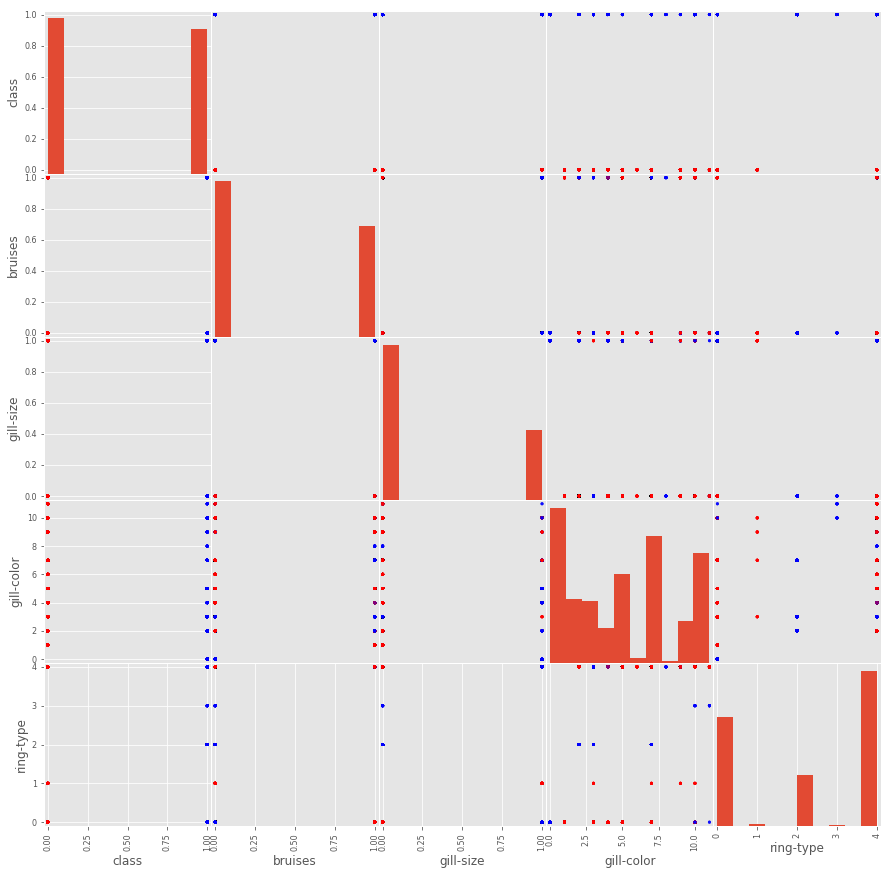

In [11]:
from pandas.plotting import scatter_matrix
columns = ['class', 'bruises', 'gill-size', 'gill-color', 'ring-type']
data = pd.DataFrame(mushrooms_2, columns=columns)
scatter_matrix(data,c=color,figsize=(15,15))

After a lot of messing around with vizualization, I realized that it was going to be really hard to find a good plot that I would easily be able to show that the data was separable. This is due to the fact that there are many different attributes and most of them are binary. The above graph was as close as I could get to showing separability. Going forward we are going to try and get the data ready for classifiers.

# Prepping the Data

In [12]:
mushrooms_2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8124 entries, 0 to 8123
Data columns (total 23 columns):
class                       8124 non-null int64
cap-shape                   8124 non-null int64
cap-surface                 8124 non-null int64
cap-color                   8124 non-null int64
bruises                     8124 non-null int64
odor                        8124 non-null int64
gill-attachment             8124 non-null int64
gill-spacing                8124 non-null int64
gill-size                   8124 non-null int64
gill-color                  8124 non-null int64
stalk-shape                 8124 non-null int64
stalk-root                  8124 non-null int64
stalk-surface-above-ring    8124 non-null int64
stalk-surface-below-ring    8124 non-null int64
stalk-color-above-ring      8124 non-null int64
stalk-color-below-ring      8124 non-null int64
veil-type                   8124 non-null int64
veil-color                  8124 non-null int64
ring-number                 8

In [13]:
sample_incomplete_rows = mushrooms_2[mushrooms_2.isnull().any(axis=1)].head()
sample_incomplete_rows

,class,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,...,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat


Our data set does not have any missing values so we do not need to worry about filling in any missing values. All of the data has already been transformed for use in classifiers with the Label Encoder so it looks like we are ready to move on to selecting a classifier

# Selecting a Classifier

## SGD Classifier

In [14]:
from sklearn.model_selection import train_test_split
train_set, test_set = train_test_split(mushrooms_2)

X_train = train_set.drop(['class'], axis=1)
Y_train = train_set['class']
X_test = test_set.drop(['class'], axis=1)
Y_test = test_set['class']

In [15]:
from sklearn.linear_model import SGDClassifier

sgdcl = SGDClassifier()
sgdcl.fit(X_train, Y_train)

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\stochastic_gradient.py:128: FutureWarning: max_iter and tol parameters have been added in <class 'sklearn.linear_model.stochastic_gradient.SGDClassifier'> in 0.19. If both are left unset, they default to max_iter=5 and tol=None. If tol is not None, max_iter defaults to max_iter=1000. From 0.21, default max_iter will be 1000, and default tol will be 1e-3.
  "and default tol will be 1e-3." % type(self), FutureWarning)


SGDClassifier(alpha=0.0001, average=False, class_weight=None, epsilon=0.1,
       eta0=0.0, fit_intercept=True, l1_ratio=0.15,
       learning_rate='optimal', loss='hinge', max_iter=None, n_iter=None,
       n_jobs=1, penalty='l2', power_t=0.5, random_state=None,
       shuffle=True, tol=None, verbose=0, warm_start=False)

### Measures on Test Set

In [16]:
from sklearn.model_selection import cross_val_score
cross_val_score(sgdcl, X_test, Y_test, cv=3, scoring="accuracy")

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\stochastic_gradient.py:128: FutureWarning: max_iter and tol parameters have been added in <class 'sklearn.linear_model.stochastic_gradient.SGDClassifier'> in 0.19. If both are left unset, they default to max_iter=5 and tol=None. If tol is not None, max_iter defaults to max_iter=1000. From 0.21, default max_iter will be 1000, and default tol will be 1e-3.
  "and default tol will be 1e-3." % type(self), FutureWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\stochastic_gradient.py:128: FutureWarning: max_iter and tol parameters have been added in <class 'sklearn.linear_model.stochastic_gradient.SGDClassifier'> in 0.19. If both are left unset, they default to max_iter=5 and tol=None. If tol is not None, max_iter defaults to max_iter=1000. From 0.21, default max_iter will be 1000, and default tol will be 1e-3.
  "and default tol will be 1e-3." % type(self), FutureWarning)
C:\ProgramData\Anaconda3\lib\sit

array([ 0.74926254,  0.92319055,  0.90680473])

In [17]:
from sklearn.model_selection import cross_val_predict

y_test_pred = cross_val_predict(sgdcl, X_test, Y_test, cv=3)

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\stochastic_gradient.py:128: FutureWarning: max_iter and tol parameters have been added in <class 'sklearn.linear_model.stochastic_gradient.SGDClassifier'> in 0.19. If both are left unset, they default to max_iter=5 and tol=None. If tol is not None, max_iter defaults to max_iter=1000. From 0.21, default max_iter will be 1000, and default tol will be 1e-3.
  "and default tol will be 1e-3." % type(self), FutureWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\stochastic_gradient.py:128: FutureWarning: max_iter and tol parameters have been added in <class 'sklearn.linear_model.stochastic_gradient.SGDClassifier'> in 0.19. If both are left unset, they default to max_iter=5 and tol=None. If tol is not None, max_iter defaults to max_iter=1000. From 0.21, default max_iter will be 1000, and default tol will be 1e-3.
  "and default tol will be 1e-3." % type(self), FutureWarning)
C:\ProgramData\Anaconda3\lib\sit

In [18]:
from sklearn.metrics import confusion_matrix

confusion_matrix(Y_test, y_test_pred)

array([[1015,   51],
       [ 133,  832]], dtype=int64)

In [19]:
from sklearn.metrics import precision_score, recall_score

precision_score(Y_test, y_test_pred)

0.94224235560588898

In [20]:
from sklearn.metrics import precision_score, recall_score

recall_score(Y_test, y_test_pred)

0.86217616580310885

In [21]:
from sklearn.metrics import f1_score
f1_score(Y_test, y_test_pred)

0.90043290043290047

In [22]:
from sklearn.metrics import roc_curve

y_scores = cross_val_predict(sgdcl, X_test, Y_test, cv=3,
                             method="decision_function")
fpr, tpr, thresholds = roc_curve(Y_test, y_scores)

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\stochastic_gradient.py:128: FutureWarning: max_iter and tol parameters have been added in <class 'sklearn.linear_model.stochastic_gradient.SGDClassifier'> in 0.19. If both are left unset, they default to max_iter=5 and tol=None. If tol is not None, max_iter defaults to max_iter=1000. From 0.21, default max_iter will be 1000, and default tol will be 1e-3.
  "and default tol will be 1e-3." % type(self), FutureWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\stochastic_gradient.py:128: FutureWarning: max_iter and tol parameters have been added in <class 'sklearn.linear_model.stochastic_gradient.SGDClassifier'> in 0.19. If both are left unset, they default to max_iter=5 and tol=None. If tol is not None, max_iter defaults to max_iter=1000. From 0.21, default max_iter will be 1000, and default tol will be 1e-3.
  "and default tol will be 1e-3." % type(self), FutureWarning)
C:\ProgramData\Anaconda3\lib\sit

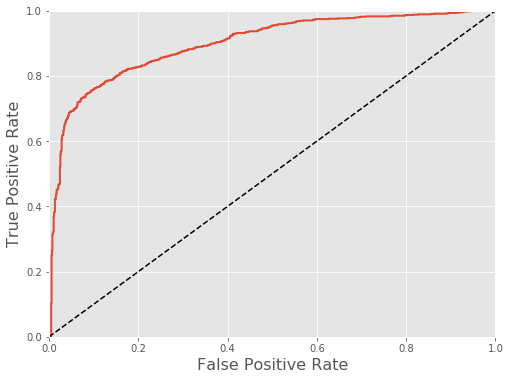

In [23]:
def plot_roc_curve(fpr, tpr, label=None):
    plt.plot(fpr, tpr, linewidth=2, label=label)
    plt.plot([0, 1], [0, 1], 'k--')
    plt.axis([0, 1, 0, 1])
    plt.xlabel('False Positive Rate', fontsize=16)
    plt.ylabel('True Positive Rate', fontsize=16)

plt.figure(figsize=(8, 6))
plot_roc_curve(fpr, tpr)
plt.show()

In [24]:
from sklearn.metrics import roc_auc_score

roc_auc_score(Y_test, y_scores)

0.89936521206583131

### Measures on Train Set

In [25]:
from sklearn.model_selection import cross_val_score
cross_val_score(sgdcl, X_train, Y_train, cv=3, scoring="accuracy")

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\stochastic_gradient.py:128: FutureWarning: max_iter and tol parameters have been added in <class 'sklearn.linear_model.stochastic_gradient.SGDClassifier'> in 0.19. If both are left unset, they default to max_iter=5 and tol=None. If tol is not None, max_iter defaults to max_iter=1000. From 0.21, default max_iter will be 1000, and default tol will be 1e-3.
  "and default tol will be 1e-3." % type(self), FutureWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\stochastic_gradient.py:128: FutureWarning: max_iter and tol parameters have been added in <class 'sklearn.linear_model.stochastic_gradient.SGDClassifier'> in 0.19. If both are left unset, they default to max_iter=5 and tol=None. If tol is not None, max_iter defaults to max_iter=1000. From 0.21, default max_iter will be 1000, and default tol will be 1e-3.
  "and default tol will be 1e-3." % type(self), FutureWarning)
C:\ProgramData\Anaconda3\lib\sit

array([ 0.93159449,  0.93500739,  0.9453202 ])

In [26]:
from sklearn.model_selection import cross_val_predict

y_train_pred = cross_val_predict(sgdcl, X_train, Y_train, cv=3)

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\stochastic_gradient.py:128: FutureWarning: max_iter and tol parameters have been added in <class 'sklearn.linear_model.stochastic_gradient.SGDClassifier'> in 0.19. If both are left unset, they default to max_iter=5 and tol=None. If tol is not None, max_iter defaults to max_iter=1000. From 0.21, default max_iter will be 1000, and default tol will be 1e-3.
  "and default tol will be 1e-3." % type(self), FutureWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\stochastic_gradient.py:128: FutureWarning: max_iter and tol parameters have been added in <class 'sklearn.linear_model.stochastic_gradient.SGDClassifier'> in 0.19. If both are left unset, they default to max_iter=5 and tol=None. If tol is not None, max_iter defaults to max_iter=1000. From 0.21, default max_iter will be 1000, and default tol will be 1e-3.
  "and default tol will be 1e-3." % type(self), FutureWarning)
C:\ProgramData\Anaconda3\lib\sit

In [27]:
from sklearn.metrics import confusion_matrix

confusion_matrix(Y_train, y_train_pred)

array([[2860,  282],
       [ 270, 2681]], dtype=int64)

In [28]:
from sklearn.metrics import precision_score, recall_score

precision_score(Y_train, y_train_pred)

0.90482618967262907

In [29]:
from sklearn.metrics import precision_score, recall_score

recall_score(Y_train, y_train_pred)

0.90850559132497455

In [30]:
from sklearn.metrics import f1_score
f1_score(Y_train, y_train_pred)

0.90666215759215407

In [31]:
from sklearn.metrics import roc_curve

y_scores = cross_val_predict(sgdcl, X_train, Y_train, cv=3,
                             method="decision_function")
fpr, tpr, thresholds = roc_curve(Y_train, y_scores)

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\stochastic_gradient.py:128: FutureWarning: max_iter and tol parameters have been added in <class 'sklearn.linear_model.stochastic_gradient.SGDClassifier'> in 0.19. If both are left unset, they default to max_iter=5 and tol=None. If tol is not None, max_iter defaults to max_iter=1000. From 0.21, default max_iter will be 1000, and default tol will be 1e-3.
  "and default tol will be 1e-3." % type(self), FutureWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\stochastic_gradient.py:128: FutureWarning: max_iter and tol parameters have been added in <class 'sklearn.linear_model.stochastic_gradient.SGDClassifier'> in 0.19. If both are left unset, they default to max_iter=5 and tol=None. If tol is not None, max_iter defaults to max_iter=1000. From 0.21, default max_iter will be 1000, and default tol will be 1e-3.
  "and default tol will be 1e-3." % type(self), FutureWarning)
C:\ProgramData\Anaconda3\lib\sit

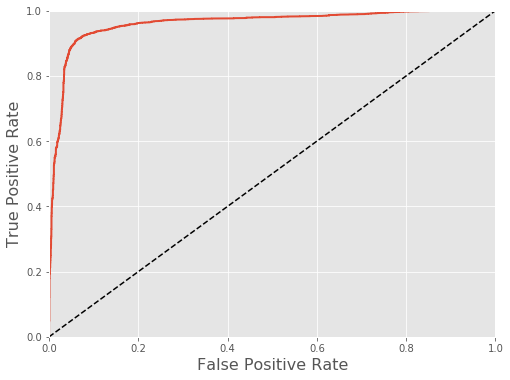

In [32]:
def plot_roc_curve(fpr, tpr, label=None):
    plt.plot(fpr, tpr, linewidth=2, label=label)
    plt.plot([0, 1], [0, 1], 'k--')
    plt.axis([0, 1, 0, 1])
    plt.xlabel('False Positive Rate', fontsize=16)
    plt.ylabel('True Positive Rate', fontsize=16)

plt.figure(figsize=(8, 6))
plot_roc_curve(fpr, tpr)
plt.show()

In [33]:
from sklearn.metrics import roc_auc_score

roc_auc_score(Y_train, y_scores)

0.96103684603671979

## Decision Tree Classifier

In [34]:
from sklearn.tree import DecisionTreeClassifier

dtc = DecisionTreeClassifier()
dtc.fit(X_train,Y_train)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best')

### Measures on Test Set

In [35]:
from sklearn.model_selection import cross_val_score
cross_val_score(dtc, X_test, Y_test, cv=3, scoring="accuracy")

array([ 0.99852507,  1.        ,  0.99852071])

In [36]:
from sklearn.model_selection import cross_val_predict

y_test_pred = cross_val_predict(dtc, X_test, Y_test, cv=3)

In [37]:
from sklearn.metrics import confusion_matrix

confusion_matrix(Y_test, y_test_pred)

array([[1066,    0],
       [   1,  964]], dtype=int64)

In [38]:
from sklearn.metrics import precision_score, recall_score

precision_score(Y_test, y_test_pred)

1.0

In [39]:
from sklearn.metrics import precision_score, recall_score

recall_score(Y_test, y_test_pred)

0.99896373056994814

In [40]:
from sklearn.metrics import f1_score
f1_score(Y_test, y_test_pred)

0.9994815966822187

In [41]:
from sklearn.metrics import roc_curve

y_probas_decision = cross_val_predict(dtc, X_test, Y_test, cv=3,
                                    method="predict_proba")
y_scores = y_probas_decision[:, 1] # score = proba of positive class
fpr, tpr, thresholds = roc_curve(Y_test, y_scores)

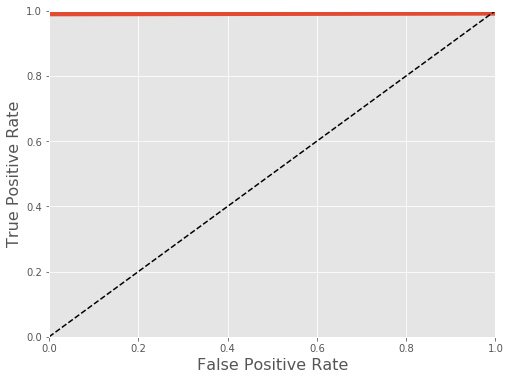

In [42]:
def plot_roc_curve(fpr, tpr, label=None):
    plt.plot(fpr, tpr, linewidth=10, label=label)
    plt.plot([0, 1], [0, 1], 'k--')
    plt.axis([0, 1, 0, 1])
    plt.xlabel('False Positive Rate', fontsize=16)
    plt.ylabel('True Positive Rate', fontsize=16)

plt.figure(figsize=(8, 6))
plot_roc_curve(fpr, tpr)
plt.show()

In [43]:
from sklearn.metrics import roc_auc_score

roc_auc_score(Y_test, y_scores)

0.99896373056994814

### Measures on Train Set

In [44]:
from sklearn.model_selection import cross_val_score
cross_val_score(dtc, X_train, Y_train, cv=3, scoring="accuracy")

array([ 1.,  1.,  1.])

In [45]:
from sklearn.model_selection import cross_val_predict

y_train_pred = cross_val_predict(dtc, X_train, Y_train, cv=3)

In [46]:
from sklearn.metrics import confusion_matrix

confusion_matrix(Y_train, y_train_pred)

array([[3142,    0],
       [   0, 2951]], dtype=int64)

In [47]:
from sklearn.metrics import precision_score, recall_score

precision_score(Y_train, y_train_pred)

1.0

In [48]:
from sklearn.metrics import precision_score, recall_score

recall_score(Y_train, y_train_pred)

1.0

In [49]:
from sklearn.metrics import f1_score
f1_score(Y_train, y_train_pred)

1.0

In [50]:
from sklearn.metrics import roc_curve

y_probas_decision = cross_val_predict(dtc, X_train, Y_train, cv=3,
                                    method="predict_proba")
y_scores = y_probas_decision[:, 1] # score = proba of positive class
fpr, tpr, thresholds = roc_curve(Y_train, y_scores)

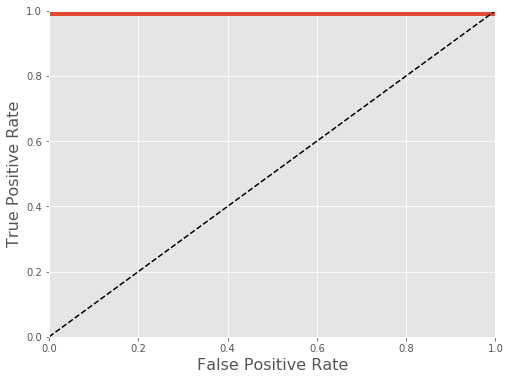

In [51]:
def plot_roc_curve(fpr, tpr, label=None):
    plt.plot(fpr, tpr, linewidth=10, label=label)
    plt.plot([0, 1], [0, 1], 'k--')
    plt.axis([0, 1, 0, 1])
    plt.xlabel('False Positive Rate', fontsize=16)
    plt.ylabel('True Positive Rate', fontsize=16)

plt.figure(figsize=(8, 6))
plot_roc_curve(fpr, tpr)
plt.show()

In [52]:
from sklearn.metrics import roc_auc_score

roc_auc_score(Y_train, y_scores)

1.0



## Random Forest Classifier

In [53]:
from sklearn.ensemble import RandomForestClassifier
rfc = RandomForestClassifier()
rfc.fit(X_train,Y_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=1,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)

### Measures on Test Set

In [54]:
from sklearn.model_selection import cross_val_score
cross_val_score(rfc, X_test, Y_test, cv=3, scoring="accuracy")

array([ 1.        ,  1.        ,  0.99556213])

In [55]:
from sklearn.model_selection import cross_val_predict

y_test_pred = cross_val_predict(rfc, X_test, Y_test, cv=3)

In [56]:
from sklearn.metrics import confusion_matrix

confusion_matrix(Y_test, y_test_pred)

array([[1066,    0],
       [   4,  961]], dtype=int64)

In [57]:
from sklearn.metrics import precision_score, recall_score

precision_score(Y_test, y_test_pred)

1.0

In [58]:
from sklearn.metrics import precision_score, recall_score

recall_score(Y_test, y_test_pred)

0.99585492227979278

In [59]:
from sklearn.metrics import f1_score
f1_score(Y_test, y_test_pred)

0.99792315680166144

In [60]:
from sklearn.metrics import roc_curve

y_probas_forest = cross_val_predict(rfc, X_test, Y_test, cv=3,
                                    method="predict_proba")
y_scores = y_probas_forest[:, 1] # score = proba of positive class
fpr, tpr, thresholds = roc_curve(Y_test, y_scores)

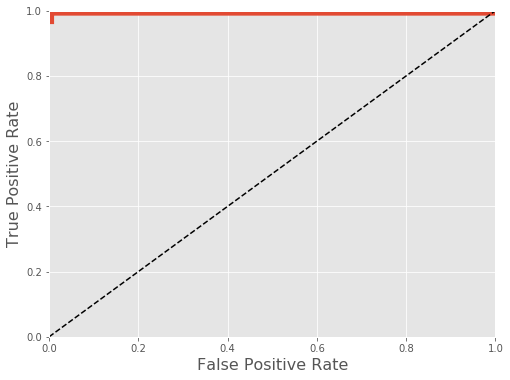

In [61]:
def plot_roc_curve(fpr, tpr, label=None):
    plt.plot(fpr, tpr, linewidth=10, label=label)
    plt.plot([0, 1], [0, 1], 'k--')
    plt.axis([0, 1, 0, 1])
    plt.xlabel('False Positive Rate', fontsize=16)
    plt.ylabel('True Positive Rate', fontsize=16)

plt.figure(figsize=(8, 6))
plot_roc_curve(fpr, tpr)
plt.show()

In [62]:
from sklearn.metrics import roc_auc_score

roc_auc_score(Y_test, y_scores)

0.99999951394492026

### Measures on Train Set

In [63]:
from sklearn.model_selection import cross_val_score
cross_val_score(rfc, X_train, Y_train, cv=3, scoring="accuracy")

array([ 1.,  1.,  1.])

In [64]:
from sklearn.model_selection import cross_val_predict

y_train_pred = cross_val_predict(rfc, X_train, Y_train, cv=3)

In [65]:
from sklearn.metrics import confusion_matrix

confusion_matrix(Y_train, y_train_pred)

array([[3142,    0],
       [   0, 2951]], dtype=int64)

In [66]:
from sklearn.metrics import precision_score, recall_score

precision_score(Y_train, y_train_pred)

1.0

In [67]:
from sklearn.metrics import precision_score, recall_score

recall_score(Y_train, y_train_pred)

1.0

In [68]:
from sklearn.metrics import f1_score
f1_score(Y_train, y_train_pred)

1.0

In [69]:
from sklearn.metrics import roc_curve

y_probas_forest = cross_val_predict(rfc, X_train, Y_train, cv=3,
                                    method="predict_proba")
y_scores = y_probas_forest[:, 1] # score = proba of positive class
fpr, tpr, thresholds = roc_curve(Y_train, y_scores)

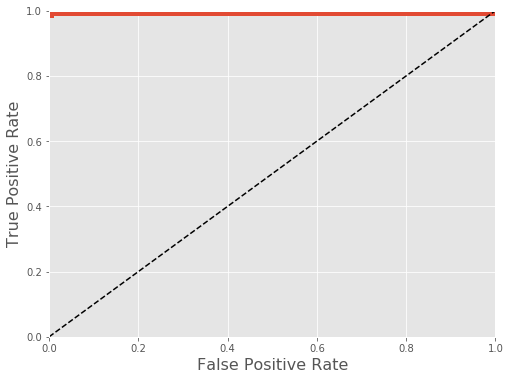

In [70]:
def plot_roc_curve(fpr, tpr, label=None):
    plt.plot(fpr, tpr, linewidth=10, label=label)
    plt.plot([0, 1], [0, 1], 'k--')
    plt.axis([0, 1, 0, 1])
    plt.xlabel('False Positive Rate', fontsize=16)
    plt.ylabel('True Positive Rate', fontsize=16)

plt.figure(figsize=(8, 6))
plot_roc_curve(fpr, tpr)
plt.show()

In [71]:
from sklearn.metrics import roc_auc_score

roc_auc_score(Y_train, y_scores)

1.0

## Analysis

The Decision Tree and Random Forest classifiers perform the best. They both have very low error and very high performance measures. There is definitely some overfitting here as both of the classifiers display almost perfect performance measures on the training set. What is confusing to me is that there is still almost perfect performance on the test set. This is something that needs to be looked at more closely. The best performance on the test set would be the Decision Tree Classifier. The reason for this is that a false negative means that a mushroom is classified as edible when it is really poisonous. This is the worst case scenario and the Decision Tree classifier has the lowest rate of false negatives. Going forward I will be using the SGD Classifier because there is something fishy going on with how high the performance measures are for the other two classifiers.

# Integrating a Regularization

The regularization that I want to integrate is LASSO because I believe that there are only a few attributes that are really contributing to our predictions. Luckily this can be done by adjusting a hyperparameter in the SGD Classifier.

In [72]:
from sklearn.linear_model import SGDClassifier

sgdcl = SGDClassifier(penalty='l1')
sgdcl.fit(X_train, Y_train)

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\stochastic_gradient.py:128: FutureWarning: max_iter and tol parameters have been added in <class 'sklearn.linear_model.stochastic_gradient.SGDClassifier'> in 0.19. If both are left unset, they default to max_iter=5 and tol=None. If tol is not None, max_iter defaults to max_iter=1000. From 0.21, default max_iter will be 1000, and default tol will be 1e-3.
  "and default tol will be 1e-3." % type(self), FutureWarning)


SGDClassifier(alpha=0.0001, average=False, class_weight=None, epsilon=0.1,
       eta0=0.0, fit_intercept=True, l1_ratio=0.15,
       learning_rate='optimal', loss='hinge', max_iter=None, n_iter=None,
       n_jobs=1, penalty='l1', power_t=0.5, random_state=None,
       shuffle=True, tol=None, verbose=0, warm_start=False)

### Measures on Test Set

In [73]:
from sklearn.model_selection import cross_val_score
cross_val_score(sgdcl, X_test, Y_test, cv=3, scoring="accuracy")

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\stochastic_gradient.py:128: FutureWarning: max_iter and tol parameters have been added in <class 'sklearn.linear_model.stochastic_gradient.SGDClassifier'> in 0.19. If both are left unset, they default to max_iter=5 and tol=None. If tol is not None, max_iter defaults to max_iter=1000. From 0.21, default max_iter will be 1000, and default tol will be 1e-3.
  "and default tol will be 1e-3." % type(self), FutureWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\stochastic_gradient.py:128: FutureWarning: max_iter and tol parameters have been added in <class 'sklearn.linear_model.stochastic_gradient.SGDClassifier'> in 0.19. If both are left unset, they default to max_iter=5 and tol=None. If tol is not None, max_iter defaults to max_iter=1000. From 0.21, default max_iter will be 1000, and default tol will be 1e-3.
  "and default tol will be 1e-3." % type(self), FutureWarning)
C:\ProgramData\Anaconda3\lib\sit

array([ 0.89233038,  0.77252585,  0.93934911])

In [74]:
from sklearn.model_selection import cross_val_predict

y_test_pred = cross_val_predict(sgdcl, X_test, Y_test, cv=3)

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\stochastic_gradient.py:128: FutureWarning: max_iter and tol parameters have been added in <class 'sklearn.linear_model.stochastic_gradient.SGDClassifier'> in 0.19. If both are left unset, they default to max_iter=5 and tol=None. If tol is not None, max_iter defaults to max_iter=1000. From 0.21, default max_iter will be 1000, and default tol will be 1e-3.
  "and default tol will be 1e-3." % type(self), FutureWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\stochastic_gradient.py:128: FutureWarning: max_iter and tol parameters have been added in <class 'sklearn.linear_model.stochastic_gradient.SGDClassifier'> in 0.19. If both are left unset, they default to max_iter=5 and tol=None. If tol is not None, max_iter defaults to max_iter=1000. From 0.21, default max_iter will be 1000, and default tol will be 1e-3.
  "and default tol will be 1e-3." % type(self), FutureWarning)
C:\ProgramData\Anaconda3\lib\sit

In [75]:
from sklearn.metrics import confusion_matrix

confusion_matrix(Y_test, y_test_pred)

array([[999,  67],
       [ 82, 883]], dtype=int64)

In [76]:
from sklearn.metrics import precision_score, recall_score

precision_score(Y_test, y_test_pred)

0.92947368421052634

In [77]:
from sklearn.metrics import precision_score, recall_score

recall_score(Y_test, y_test_pred)

0.91502590673575135

In [78]:
from sklearn.metrics import f1_score
f1_score(Y_test, y_test_pred)

0.92219321148825073

In [79]:
from sklearn.metrics import roc_curve

y_scores = cross_val_predict(sgdcl, X_test, Y_test, cv=3,
                             method="decision_function")
fpr, tpr, thresholds = roc_curve(Y_test, y_scores)

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\stochastic_gradient.py:128: FutureWarning: max_iter and tol parameters have been added in <class 'sklearn.linear_model.stochastic_gradient.SGDClassifier'> in 0.19. If both are left unset, they default to max_iter=5 and tol=None. If tol is not None, max_iter defaults to max_iter=1000. From 0.21, default max_iter will be 1000, and default tol will be 1e-3.
  "and default tol will be 1e-3." % type(self), FutureWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\stochastic_gradient.py:128: FutureWarning: max_iter and tol parameters have been added in <class 'sklearn.linear_model.stochastic_gradient.SGDClassifier'> in 0.19. If both are left unset, they default to max_iter=5 and tol=None. If tol is not None, max_iter defaults to max_iter=1000. From 0.21, default max_iter will be 1000, and default tol will be 1e-3.
  "and default tol will be 1e-3." % type(self), FutureWarning)
C:\ProgramData\Anaconda3\lib\sit

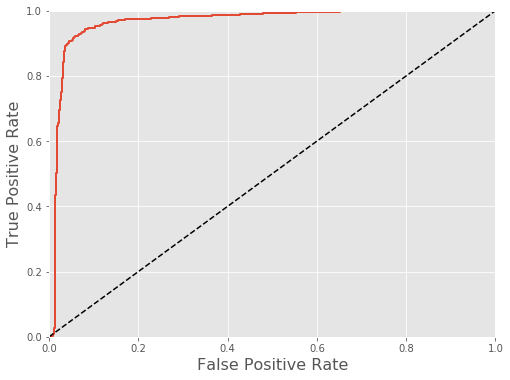

In [80]:
def plot_roc_curve(fpr, tpr, label=None):
    plt.plot(fpr, tpr, linewidth=2, label=label)
    plt.plot([0, 1], [0, 1], 'k--')
    plt.axis([0, 1, 0, 1])
    plt.xlabel('False Positive Rate', fontsize=16)
    plt.ylabel('True Positive Rate', fontsize=16)

plt.figure(figsize=(8, 6))
plot_roc_curve(fpr, tpr)
plt.show()

In [81]:
from sklearn.metrics import roc_auc_score

roc_auc_score(Y_test, y_scores)

0.96592851101886867

### Measures on Train Set

In [82]:
from sklearn.model_selection import cross_val_score
cross_val_score(sgdcl, X_train, Y_train, cv=3, scoring="accuracy")

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\stochastic_gradient.py:128: FutureWarning: max_iter and tol parameters have been added in <class 'sklearn.linear_model.stochastic_gradient.SGDClassifier'> in 0.19. If both are left unset, they default to max_iter=5 and tol=None. If tol is not None, max_iter defaults to max_iter=1000. From 0.21, default max_iter will be 1000, and default tol will be 1e-3.
  "and default tol will be 1e-3." % type(self), FutureWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\stochastic_gradient.py:128: FutureWarning: max_iter and tol parameters have been added in <class 'sklearn.linear_model.stochastic_gradient.SGDClassifier'> in 0.19. If both are left unset, they default to max_iter=5 and tol=None. If tol is not None, max_iter defaults to max_iter=1000. From 0.21, default max_iter will be 1000, and default tol will be 1e-3.
  "and default tol will be 1e-3." % type(self), FutureWarning)
C:\ProgramData\Anaconda3\lib\sit

array([ 0.94783465,  0.86853767,  0.87241379])

In [83]:
from sklearn.model_selection import cross_val_predict

y_train_pred = cross_val_predict(sgdcl, X_train, Y_train, cv=3)

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\stochastic_gradient.py:128: FutureWarning: max_iter and tol parameters have been added in <class 'sklearn.linear_model.stochastic_gradient.SGDClassifier'> in 0.19. If both are left unset, they default to max_iter=5 and tol=None. If tol is not None, max_iter defaults to max_iter=1000. From 0.21, default max_iter will be 1000, and default tol will be 1e-3.
  "and default tol will be 1e-3." % type(self), FutureWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\stochastic_gradient.py:128: FutureWarning: max_iter and tol parameters have been added in <class 'sklearn.linear_model.stochastic_gradient.SGDClassifier'> in 0.19. If both are left unset, they default to max_iter=5 and tol=None. If tol is not None, max_iter defaults to max_iter=1000. From 0.21, default max_iter will be 1000, and default tol will be 1e-3.
  "and default tol will be 1e-3." % type(self), FutureWarning)
C:\ProgramData\Anaconda3\lib\sit

In [84]:
from sklearn.metrics import confusion_matrix

confusion_matrix(Y_train, y_train_pred)

array([[2982,  160],
       [ 266, 2685]], dtype=int64)

In [85]:
from sklearn.metrics import precision_score, recall_score

precision_score(Y_train, y_train_pred)

0.94376098418277676

In [86]:
from sklearn.metrics import precision_score, recall_score

recall_score(Y_train, y_train_pred)

0.90986106404608602

In [87]:
from sklearn.metrics import f1_score
f1_score(Y_train, y_train_pred)

0.92650103519668725

In [88]:
from sklearn.metrics import roc_curve

y_scores = cross_val_predict(sgdcl, X_train, Y_train, cv=3,
                             method="decision_function")
fpr, tpr, thresholds = roc_curve(Y_train, y_scores)

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\stochastic_gradient.py:128: FutureWarning: max_iter and tol parameters have been added in <class 'sklearn.linear_model.stochastic_gradient.SGDClassifier'> in 0.19. If both are left unset, they default to max_iter=5 and tol=None. If tol is not None, max_iter defaults to max_iter=1000. From 0.21, default max_iter will be 1000, and default tol will be 1e-3.
  "and default tol will be 1e-3." % type(self), FutureWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\stochastic_gradient.py:128: FutureWarning: max_iter and tol parameters have been added in <class 'sklearn.linear_model.stochastic_gradient.SGDClassifier'> in 0.19. If both are left unset, they default to max_iter=5 and tol=None. If tol is not None, max_iter defaults to max_iter=1000. From 0.21, default max_iter will be 1000, and default tol will be 1e-3.
  "and default tol will be 1e-3." % type(self), FutureWarning)
C:\ProgramData\Anaconda3\lib\sit

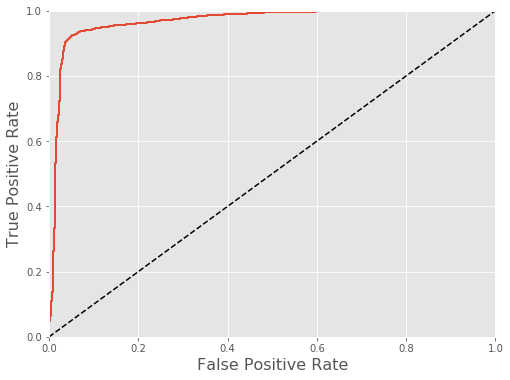

In [89]:
def plot_roc_curve(fpr, tpr, label=None):
    plt.plot(fpr, tpr, linewidth=2, label=label)
    plt.plot([0, 1], [0, 1], 'k--')
    plt.axis([0, 1, 0, 1])
    plt.xlabel('False Positive Rate', fontsize=16)
    plt.ylabel('True Positive Rate', fontsize=16)

plt.figure(figsize=(8, 6))
plot_roc_curve(fpr, tpr)
plt.show()

In [90]:
from sklearn.metrics import roc_auc_score

roc_auc_score(Y_train, y_scores)

0.96792939462526151

Looking at the performance measures of the SGD Classifier before and after implementing LASSO we can see that implementing LASSO has improved the classifier's performance slightly. Unfortuately for us the most improved measure was the precision. In the case of poisonous mushrooms we dont really care about false positives so this increase in performance is only marginal for us.

# Presenting the Solution

Pitch: 
There are a lot of different situations where someone might need to decide whether or not a mushroom is edible or not. For someone lost in the wilderness or for a boy scout it could be a life or death situation. Having an app that can take a snapshot of a mushroom and instantly tell a camper/boy scout/tour guide whether or not the mushroom is poisonous could save lives. The classification model that I have created for you can tell you whether or not a mushroom is poisonous at a very low false negative rate (the rate at which mushrooms are classified as edible when they are poisonous). I cannot guarantee that those who use the app will be able to gather enough edible mushrooms to make a four-course meal, but I can make sure that they are not risking their lives.

What I've learned:
Classifier models are a lot more susceptible to overfitting and weird results than linear regressors. I think that there is a lot more for me to learn about classifiers especially with the hyperparameters of all the different classifiers.

# Planning for the Future

More Data?

Yes. There 100% needs to be more data. I do not feel like the data that I had was enough to make a very accurate model. I think that it would have helped a lot to have more data in evaluating the performance of my models.

Future of the Model?

I think that the model is not sufficient for the future. The main reason I believe this is that mushrooms evolve just like humans. There could be new species of mushrooms that pop up that would be classified completely wrong because they were not represented in my original training data. The model would need to be updated as new species were discovered.

Satisfied?

For a first attempt at building a classification model I think that I am pretty satisfied with the work that I have done. Overally I don't think I am very satisfied with the model. I think that there are somethings that I need to learn about the different classifiers and their hyper parameters before I can choose which is the best perfoming model. I also think that I need to learn more about visualizing categorical data. I think there were insights that I was not able to pick up on because I only knew basic plotting tools. I also was not satisfied with how much data I had. I think more data would have helped, especially with determining which model performed best.